# Websites Phishing using Supervised and Unsupervised Machine Learning

Phishing is the fraudulent attempt to obtain sensitive information or data, such as usernames, passwords, credit card numbers, or other sensitive details by impersonating oneself as a trustworthy entity in a digital communication. Typically carried out by email spoofing, instant messaging, and text messaging, phishing often directs users to enter personal information at a fake website which matches the look and feel of the legitimate site.

Phishing is by far the most common attack performed by cyber-criminals, recording over twice as many incidents of phishing than any other type of computer crime.

As per Data by FBI, crime related to phishing increased rapidly from 2016 to 2020 


The main idea of this project is to how website phishing attacks can be prevented using supervised machine learning technique. In this project I am going to  train the Logistic Regression model with the UCI Phishing Websites Data Set and see how accurate our model differentiate between Phishing and Legitimate website. 

In this project I am going to use UCI Phishing Websites Data Set, which contains 11055 instances and 31 attributes.
Link for UCI Phishing Websites Dataset: https://archive.ics.uci.edu/ml/datasets/phishing+websites

First, we will import the dataset and see the dataset.

# Logistic Regression 

In [229]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *
from keras import callbacks
import warnings
warnings.filterwarnings("ignore")

In [230]:
df=pd.read_csv('D:/Security/Project/Phishing Dataset/csv_result-Training Dataset.csv')

In [231]:
df.head().T

,0,1,2,3,4
having_IP_Address,-1,1,1,1,1
URL_Length,1,1,0,0,0
Shortining_Service,1,1,1,1,-1
having_At_Symbol,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1
SSLfinal_State,-1,1,-1,-1,1
Domain_registeration_length,-1,-1,-1,1,-1
Favicon,1,1,1,1,1


In [232]:
df.shape

(11055, 31)

Checking all columns in the dataset

In [233]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

Now we will check the total number of observations and classes in the dataset:


In [234]:

from collections import Counter
classes = Counter(df['Result'].values)
classes.most_common()


[(1, 6157), (-1, 4898)]

In [235]:
class_distribution = pd.DataFrame(classes.most_common(), columns=['Class', 'Number of Observations'])
class_distribution

,Class,Number of Observations
0,1,6157
1,-1,4898


As result dataset contains 4898 observation from -1 class shows Phishing data and 6157 observations from 1 class shows Legitimate data.

Plotting Class vs Number of Observations:


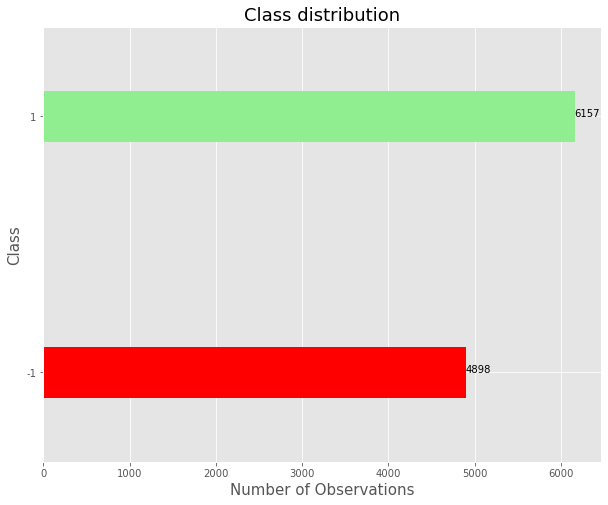

In [236]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plot = class_distribution.groupby('Class')['Number of Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8),color=('red','lightgreen'))


plot.set_title('Class distribution', fontsize = 18)
plot.set_xlabel('Number of Observations', fontsize = 15)
plot.set_ylabel('Class', fontsize = 15)

for i in plot.patches:
    plot.text(i.get_width()+0.1, i.get_y()+0.1,str(i.get_width()), fontsize=10)

Descriptive Statistics Summary of the dataset:

In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


Concise summary of the dataset data type:

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

Renaming "Result" to "Class" and Replacing -1 to 0

In [239]:
df.rename(columns={'Result': 'Class'}, inplace=True)

df['Class'] = df['Class'].map({-1:0, 1:1})
df['Class'].unique()

array([0, 1], dtype=int64)

Checking for NA values:

In [240]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

Now we are going to split the dataset into training and testing set with test size 20% and train size 80% to train the model

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

Applying the Supervised Machine Learning Algorithm Logistic Regression and fitting the data into model

In [243]:
from sklearn.linear_model import LogisticRegression

logistic_Regression = LogisticRegression()
logistic_Regression.fit(X_train, y_train)

LogisticRegression()

Now Predicting and checking accuracy on test data based on Logistic Regression algorithm

In [244]:
from sklearn.metrics import accuracy_score, classification_report
score = logistic_Regression.score(X_test, y_test)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Logistic Regression Classifier {0:.2f}%'
      .format(accuracy_score(y_test, logistic_Regression.predict(X_test))*100.))
print('\n')
print('*****Classification report of the Logistic Regression classifier*****')
print('\n')
print(classification_report(y_test, logistic_Regression.predict(X_test), 
                            target_names=['Phishing Websites', 'Normal Websites']))


Accuracy score  0.9371325192220714


Accuracy score of the Logistic Regression Classifier 93.71%


*****Classification report of the Logistic Regression classifier*****


                   precision    recall  f1-score   support

Phishing Websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211



As above prediction accuracy shows that 93%, which means our model is doing good prediction.

Now we will create the Confusion Matrix:


In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [246]:
confusion_matrix = metrics.confusion_matrix(y_test, logistic_Regression.predict(X_test))
print(confusion_matrix)

[[ 896   78]
 [  61 1176]]


Plotting Confusion Matrix

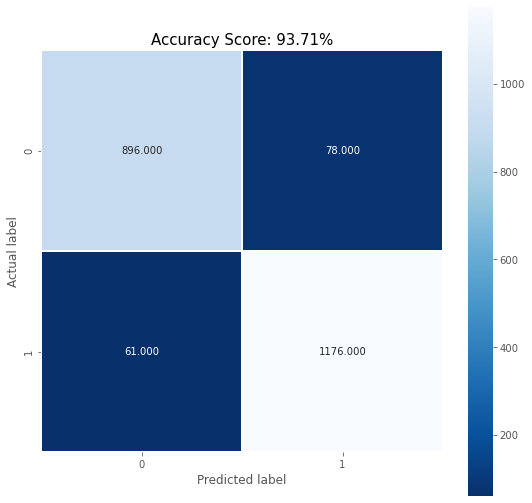

In [247]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(y_test, logistic_Regression.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);

The Confusion Matrix tells us the following:

•	There are two possible predicted classes: 0 and 1. If we were predicting that the website is, for example, 0 mean phishing, and 1 means legitimate.

•	The classifier made a total of 2211 predictions.

•	Out of those 2211 cases, the classifier predicted “0” 896 times, and “1” 1176 times.

•	In reality, 1237 data are legitimate and 974 are phishing.
	
Basic terms related to Confusion matrix:

•	True positives (TP): These are cases in which we predicted one (legitimate ), 1176

•	True negatives (TN): We predicted zero(phishing), 896

•	False positives (FP): We predicted one they will legitimate, but they are not phishing. (Also known as a “Type I error.”) 78

•	False negatives (FN): We predicted zero they are not legitimate, but they actually phishing (Also known as a “Type II error.”), 61

Accuracy: (TP+TN)/Total . Describes overall, how often the classifier correct. i.e. (896+1176)/2211


# Neural Network

Split the data

In [248]:
X = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

Model building using the Sequential API

In [249]:
model = Sequential()

model.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Model Summary

In [250]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [251]:
es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

Fit the model on batch_size=64, epochs=128 and calculate the accuracy score

In [252]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, batch_size=64, epochs=128,validation_split=0.05 ,verbose=1, callbacks=[es_cb])
scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network is {0:.2f}%'.format(scores[1]*100))

Epoch 1/128
132/132 [==============================] - 2s 5ms/step - loss: 0.5775 - accuracy: 0.7110 - val_loss: 0.2366 - val_accuracy: 0.9120
Epoch 2/128
132/132 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9134 - val_loss: 0.2173 - val_accuracy: 0.9233
Epoch 3/128
132/132 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9217 - val_loss: 0.2117 - val_accuracy: 0.9187
Epoch 4/128
132/132 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9215 - val_loss: 0.2119 - val_accuracy: 0.9097
Epoch 5/128
132/132 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9238 - val_loss: 0.2053 - val_accuracy: 0.9142
Epoch 6/128
132/132 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9333 - val_loss: 0.2046 - val_accuracy: 0.9210
Epoch 7/128
132/132 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9285 - val_loss: 0.1988 - val_accuracy: 0.9210

Fit the model on batch_size=10, epochs=150 and calculate the accuracy score

In [253]:
# fit the keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=150, verbose=1, callbacks=[es_cb])
# make class predictions with the model
predictions = model.predict_classes(X_test)
# summarize the first 5 cases
for i in range(10):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))
scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network is {0:.2f}%'.format(scores[1]*100))    

Epoch 1/150
885/885 [==============================] - 2s 2ms/step - loss: 0.1158 - accuracy: 0.9512
Epoch 2/150
885/885 [==============================] - 2s 2ms/step - loss: 0.1063 - accuracy: 0.9545
Epoch 3/150
885/885 [==============================] - 2s 2ms/step - loss: 0.1005 - accuracy: 0.9582
Epoch 4/150
885/885 [==============================] - 2s 2ms/step - loss: 0.1008 - accuracy: 0.9586
Epoch 5/150
885/885 [==============================] - 2s 2ms/step - loss: 0.0996 - accuracy: 0.9577
Epoch 6/150
885/885 [==============================] - 2s 2ms/step - loss: 0.0944 - accuracy: 0.9601
Epoch 7/150
885/885 [==============================] - 2s 2ms/step - loss: 0.0945 - accuracy: 0.9586
Epoch 8/150
885/885 [==============================] - 2s 2ms/step - loss: 0.0905 - accuracy: 0.9628
Epoch 9/150
885/885 [==============================] - 2s 2ms/step - loss: 0.0881 - accuracy: 0.9633
Epoch 10/150
885/885 [==============================] - 2s 2ms/step - loss: 0.0874 - accura

Plot for Loss Train vs Valid

In [300]:
import plotly.graph_objects as go
result_plot = go.Figure()
result_plot.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

result_plot.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))

result_plot.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss', 
                  title="Training and Validation Loss")

result_plot.show()

Plot for Accuracy Train vs Valid

In [301]:
result_plot = go.Figure()
result_plot.add_trace(go.Scattergl(y=history.history['accuracy'],
                    name='Train'))
result_plot.add_trace(go.Scattergl(y=history.history['val_accuracy'],
                    name='Valid'))
result_plot.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy',
                  title="Training and Validation Accuracy")

result_plot.show() 


# K-Means Clustering

In [256]:

df_unsup=pd.read_csv('D:/Security/Project/Phishing Dataset/csv_result-Training Dataset.csv')

Replacing -1 to 0

In [257]:
df_unsup.replace(-1,0,inplace=True) #replace all value from -1 to 0
df_unsup

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,1,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,0
1,1,1,1,1,1,0,0,1,0,1,...,1,1,0,0,0,0,1,1,1,0
2,1,0,1,1,1,0,0,0,0,1,...,1,1,1,0,1,0,1,0,0,0
3,1,0,1,1,1,0,0,0,1,1,...,1,1,0,0,1,0,1,0,1,0
4,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,0,1,0,1,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,1
11051,0,1,1,0,0,0,1,0,0,0,...,0,1,1,1,1,1,1,0,1,0
11052,1,0,1,1,1,0,1,0,0,1,...,1,1,1,1,1,0,1,0,1,0
11053,0,0,1,1,1,0,0,0,1,0,...,0,1,1,1,1,0,1,1,1,0


Applying K-Means 

In [258]:
from sklearn.cluster import KMeans
X_sup = df_unsup.drop(['Result'], axis=1)
y_sup = df_unsup['Result']
kmeans = KMeans(n_clusters=2, random_state=None)
kmeans.fit(X_sup)


KMeans(n_clusters=2)

In [259]:
X_sup

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0,1,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,1,0
1,1,1,1,1,1,0,0,1,0,1,...,1,1,1,0,0,0,0,1,1,1
2,1,0,1,1,1,0,0,0,0,1,...,1,1,1,1,0,1,0,1,0,0
3,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,0,1,0,1,0,1
4,1,0,0,1,1,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,0,1,0,1,1,1,1,0,0,...,0,0,0,1,1,0,0,1,1,1
11051,0,1,1,0,0,0,1,0,0,0,...,1,0,1,1,1,1,1,1,0,1
11052,1,0,1,1,1,0,1,0,0,1,...,1,1,1,1,1,1,0,1,0,1
11053,0,0,1,1,1,0,0,0,1,0,...,1,0,1,1,1,1,0,1,1,1


Predict

In [260]:
clusters = kmeans.predict(X_sup)

In [261]:
clusters

array([0, 1, 0, ..., 1, 0, 1])

In [262]:
cluster_df = pd.DataFrame()
cluster_df['cluster'] = clusters

cluster_df['Result'] = y_sup

In [263]:
cluster_df['Result']

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Result, Length: 11055, dtype: int64

Plotting the Clusters

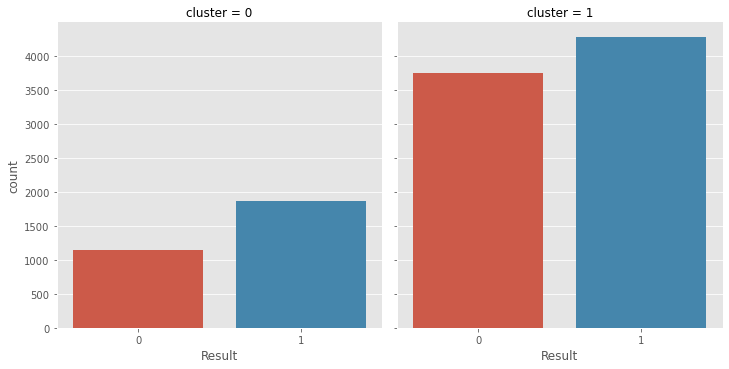

In [264]:
sns.factorplot(col='cluster', y=None, x='Result', data=cluster_df, kind='count')

Calculate the Accuracy Score

In [265]:
print('Accuracy Score: {0:.2f}%'.format(accuracy_score(y_sup, kmeans.predict(X_sup))*100.))
print('\n')
print('Accuracy score of the K-Means Clustering Classifier {0:.2f}%'
      .format(accuracy_score(y_sup, kmeans.predict(X_sup))*100.))
print('\n')
print('*****Classification report of the K-Means Clustering classifier*****')
print('\n')
print(classification_report(y_sup, kmeans.predict(X_sup), 
                            target_names=['Phishing Websites', 'Normal Websites']))

Accuracy Score: 49.11%


Accuracy score of the K-Means Clustering Classifier 49.11%


*****Classification report of the K-Means Clustering classifier*****


                   precision    recall  f1-score   support

Phishing Websites       0.38      0.23      0.29      4898
  Normal Websites       0.53      0.70      0.60      6157

         accuracy                           0.49     11055
        macro avg       0.46      0.46      0.45     11055
     weighted avg       0.46      0.49      0.46     11055



Create Confusion Matrix

In [266]:
confusion_matrix_k_means = metrics.confusion_matrix(y_sup, kmeans.predict(X_sup))
print(confusion_matrix_k_means)

[[1144 3754]
 [1872 4285]]


Plotting Confusion Matrix

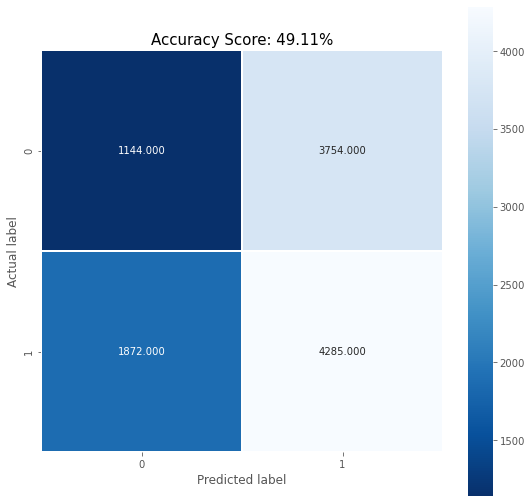

In [267]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix_k_means, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(y_sup, kmeans.predict(X_sup))*100.)
plt.title(all_sample_title, size = 15);

The Confusion Matrix tells us the following:

• There are two possible predicted classes: 0 and 1. If we were predicting that the website is, for example, 0 mean phishing, and 1 means legitimate.

• The classifier made a total of 11055 predictions.

• Out of those 11055 cases, the classifier predicted “0” 1144 times, and “1” 4285 times.

• In reality, 6157 data are legitimate and 4898 are phishing.

Basic terms related to Confusion matrix:

• True positives (TP): These are cases in which we predicted one (legitimate ), 4285

• True negatives (TN): We predicted zero(phishing), 1144

• False positives (FP): We predicted one they will legitimate, but they are not phishing. (Also known as a “Type I error.”) 3754

• False negatives (FN): We predicted zero they are not legitimate, but they actually phishing (Also known as a “Type II error.”), 1872

Accuracy: (TP+TN)/Total . Describes overall, how often the classifier correct. i.e. (1144+4285)/11055

Using the elbow method to find the optimal number of clusters

In [268]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_sup)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Plotting Elbow Method

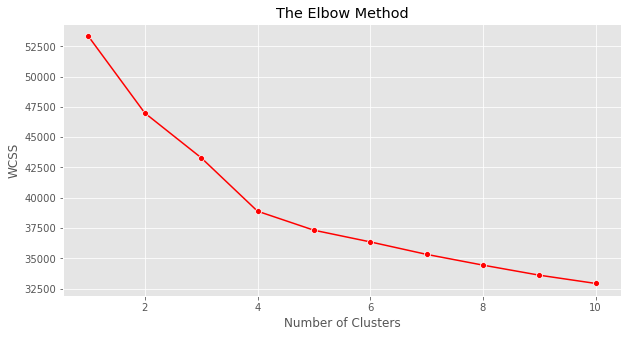

In [269]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means to the dataset for 2 clusters

In [270]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 51)
y_kmeans = kmeans.fit_predict(X_sup)

Visualising the Clusters

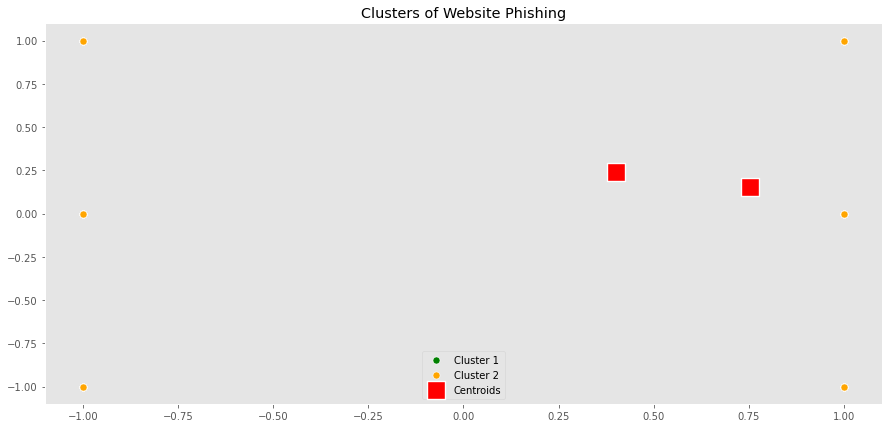

In [271]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'green', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 2',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Website Phishing')
plt.legend()
plt.show()

# K-Modes Clustering

In [272]:
from kmodes.kmodes import KModes

K-Mode with "Cao" initialization

In [273]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_unsup)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 266, cost: 74832.0


In [274]:
fitClusters_cao 

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [275]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_unsup.columns

In [276]:
# Mode of the clusters
clusterCentroidsDf

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,1,0,1,...,1,1,1,1,1,0,1,0,1,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,1,0


 K-Mode with "Huang" initialization

In [277]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_unsup)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2385, cost: 70315.0
Run 1, iteration: 2/100, moves: 1314, cost: 70315.0


In [278]:
# Predicted clusters
fitClusters_huang


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Determining the optimum value of k using cost function

In [279]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_unsup)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 79902.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 266, cost: 74832.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2904, cost: 64404.0
Run 1, iteration: 2/100, moves: 1224, cost: 63966.0
Run 1, iteration: 3/100, moves: 257, cost: 63966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3232, cost: 57818.0
Run 1, iteration: 2/100, moves: 1829, cost: 55780.0
Run 1, iteration: 3/100, moves: 401, cost: 55780.0


Plotting for Cost Function

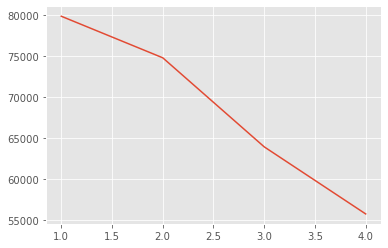

In [280]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Choosing K=2

In [281]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_unsup)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 266, cost: 74832.0


In [282]:
fitClusters_cao

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

Combining the predicted clusters with the original Data frame

In [283]:
df_unsup_copy = df_unsup.copy()


In [284]:
df_unsup = df_unsup_copy.reset_index()

In [285]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_unsup, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [286]:
combinedDf.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,cluster_predicted
0,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
1,1,1,1,1,1,0,0,1,0,1,...,1,0,0,0,0,1,1,1,0,0
2,1,0,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,0,0,0,0
3,1,0,1,1,1,0,0,0,1,1,...,1,0,0,1,0,1,0,1,0,0
4,1,0,0,1,1,0,1,1,0,1,...,1,0,0,0,0,1,1,1,1,0


In [287]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [288]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272 entries, 1 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            10272 non-null  int64 
 1   URL_Length                   10272 non-null  int64 
 2   Shortining_Service           10272 non-null  int64 
 3   having_At_Symbol             10272 non-null  int64 
 4   double_slash_redirecting     10272 non-null  int64 
 5   Prefix_Suffix                10272 non-null  int64 
 6   having_Sub_Domain            10272 non-null  int64 
 7   SSLfinal_State               10272 non-null  int64 
 8   Domain_registeration_length  10272 non-null  int64 
 9   Favicon                      10272 non-null  int64 
 10  port                         10272 non-null  int64 
 11  HTTPS_token                  10272 non-null  int64 
 12  Request_URL                  10272 non-null  int64 
 13  URL_of_Anchor                10

In [289]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 11051
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            783 non-null    int64 
 1   URL_Length                   783 non-null    int64 
 2   Shortining_Service           783 non-null    int64 
 3   having_At_Symbol             783 non-null    int64 
 4   double_slash_redirecting     783 non-null    int64 
 5   Prefix_Suffix                783 non-null    int64 
 6   having_Sub_Domain            783 non-null    int64 
 7   SSLfinal_State               783 non-null    int64 
 8   Domain_registeration_length  783 non-null    int64 
 9   Favicon                      783 non-null    int64 
 10  port                         783 non-null    int64 
 11  HTTPS_token                  783 non-null    int64 
 12  Request_URL                  783 non-null    int64 
 13  URL_of_Anchor                783 

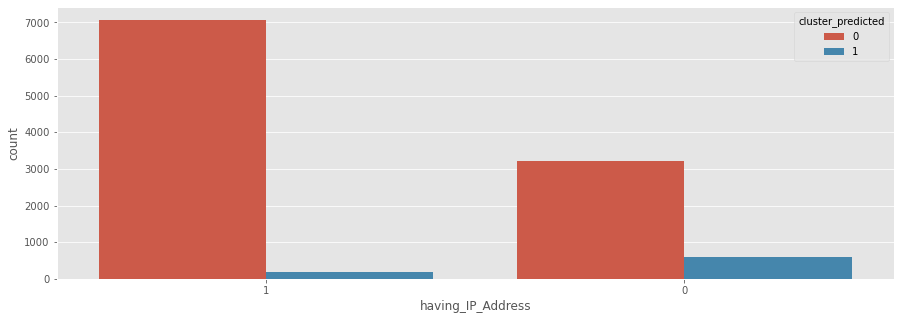

In [290]:
# Having IP address
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['having_IP_Address'],order=combinedDf['having_IP_Address'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

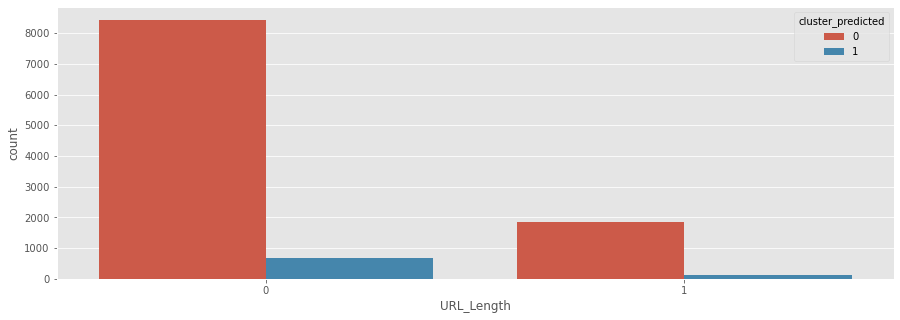

In [291]:
# cluster_predicted
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['URL_Length'],order=combinedDf['URL_Length'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

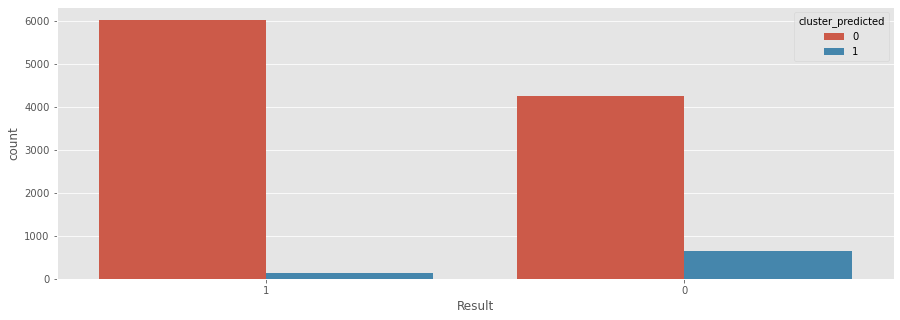

In [292]:
# Result
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Result'],order=combinedDf['Result'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

Print the cluster centroids

In [293]:
print(km_huang.cluster_centroids_)

[[1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0]
 [1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1]]
